In [ ]:
import cdlib
import networkx as nx

g = nx.karate_club_graph()

from cdlib import algorithms

lp_coms = algorithms.label_propagation(g)

leiden_coms = algorithms.label_propagation(g)

# both leiden and label propagation return a NodeClusering object with the
# following properties:
leiden_coms.method_name # returns the type of community detection done
leiden_coms.method_parameters # returns clustering parameters, such as initial_membership and weights
leiden_coms.communities # returns series of arrays with the nodes of each community
leiden_coms.overlap # bool, is the clustering overlapping?
leiden_coms.node_coverage # density [0, 1] of the nodes inside a community

# clustering object allow JSON representation
leiden_coms.to_json() # basically a readable, compact dictionary

# with a clustering object it is possible to compute various indices
leiden_coms.average_internal_degree() # returns min/max/score/std
leiden_coms.average_internal_degree(summary = False) # returns the index community-by-community

# you can compare different clusterings on the same network
evaluation.normalized_mutual_information(leiden_coms, lp_coms)

# it is possibile to visualize the network;
# our network is big, so what we do is making the communities collapse onto
# a node and link them accordingly
from cdlib import viz
viz.plot_community_graph(g, leiden_coms, figsize=(3, 3))

# violin plots are used to visualize how a fitness function distributes
# over the communities (given more clusterings)
viz.plot_com_stat([leiden_coms, lp_coms], evaluation.internal_edge_density)

Via ora si prova a fare il nostro

In [1]:
!pip install cdlib
!pip install networkx

import cdlib
import networkx as nx
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

#uploading the data
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/edges.csv'
df = pd.read_csv(file_path)

# building the network
g = nx.from_pandas_edgelist(df, 'source', 'target', create_using=nx.DiGraph, edge_attr='count')

# adding labels to each node
df['source_class'] = df['source_class'].str[0] # takes the first letter
df['target_class'] = df['target_class'].str[0]
df_target = pd.concat([df['target'], df['target_class']], axis=1).drop_duplicates()
df_source = pd.concat([df['source'], df['source_class']], axis=1).drop_duplicates()
df_target = df_target.rename(columns={'target': 'user', 'target_class': 'label'})
df_source = df_source.rename(columns={'source': 'user', 'source_class': 'label'})
df_full = pd.concat([df_target, df_source], ignore_index=True).drop_duplicates() # dataframe user-to-label
user_to_label = df_full.set_index('user')['label'].to_dict()
nx.set_node_attributes(g, user_to_label, 'label')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.6/263.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 41.4 MB/s eta 0:00:00
Mounted at /content/drive


In [4]:
# Louvain algorithm
from cdlib import algorithms, viz, evaluation
g_undirected = g.to_undirected()
louvain_coms = algorithms.louvain(g_undirected) # Louvain works only on undirected graphs

proportions_e = [] # I create a list of "fractions of extraversion" for each community
for community in louvain_coms.communities:
  count_e = sum(1 for node in community if g_undirected.nodes[node].get('label') == 'e')
  proportions_e.append(count_e / len(community))
print(proportions_e)

cmap = cm.get_cmap('bwr')
community_colors = [cmap(proportion) for proportion in proportions_e]

#viz.plot_community_graph(g_undirected, louvain_coms, figsize=(10.6, 10.6))
density_louvain = evaluation.internal_edge_density(g_undirected, louvain_coms)
print("Density louvain:", density_louvain)
print("Node coverage louvain", louvain_coms.node_coverage)
print("Overlap louvain", louvain_coms.overlap)
print("Average internal degree louvain", louvain_coms.average_internal_degree())

[0.2938078108941418, 0.2930632468668027, 0.2902185071124798, 0.28697613230595753, 0.3333333333333333, 0.0, 0.0, 0.0, 0.5, 1.0, 0.0, 1.0, 0.0, 0.0]
Density louvain: FitnessResult(min=0.002513878840210811, max=1.0, score=0.6436428307011148, std=0.4253988591590185)
Node coverage louvain 1.0
Overlap louvain False
Average internal degree louvain FitnessResult(min=1.0, max=22.320281566212053, score=6.038184849819755, std=7.968931657870513)


In [3]:
# infomap, works on directed graphs
from cdlib import algorithms, viz, evaluation
infomap_coms = algorithms.infomap(g)

#viz.plot_community_graph(g, infomap_coms, figsize=(10.6, 10.6))
density_infomap = evaluation.internal_edge_density(g, infomap_coms)
print("Density infomap:", density_infomap)
print("Node coverage infomap", infomap_coms.node_coverage)
print("Overlap infomap", infomap_coms.overlap)
print("Average internal degree infomap", infomap_coms.average_internal_degree())

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'graph_tool', 'bayanpy', 'infomap', 'leidenalg'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'leidenalg', 'wurlitzer'}
Density infomap: FitnessResult(min=0.0031609397629123953, max=2.0, score=0.6546833678701761, std=0.5925075082029501)
Node coverage infomap 1.0
Overlap infomap False
Average internal degree infomap FitnessResult(min=1.0, max=33.98958527059699, score=2.633385058453372, std=1.4799408351134484)


In [ ]:
# Demon algorithm
demon_coms = algorithms.demon(g, epsilon=0.5) # epsilon is the mixing parametre [0, 1],
# the higher the value, the higher the mixing
# i.e. high epsilon => large number of small communities, low epsilon => small number of big communities
#viz.plot_community_graph(g, demon_coms, figsize=(10.6, 10.6))
density_demon = evaluation.internal_edge_density(g, demon_coms)
print("Density demon:", density_demon)
print("Node coverage demon", demon_coms.node_coverage)
print("Overlap demon", demon_coms.overlap)
print("Average internal degree demon", demon_coms.average_internal_degree())

Density demon: FitnessResult(min=0.007411325058053667, max=1.1666666666666667, score=0.1550531973481426, std=0.12625227718722465)
Node coverage demon 0.6309448319594166
Overlap demon True
Average internal degree demon FitnessResult(min=2.5, max=81.25886600127416, score=25.179879312582447, std=18.36118687561709)


In [ ]:
# Label propagation
lp_coms = algorithms.label_propagation(g_undirected)
#viz.plot_community_graph(g, lp_coms, figsize=(10.6, 10.6))
density_lp = evaluation.internal_edge_density(g_undirected, lp_coms)
print("Density label propagation:", density_lp)
print("Node coverage lp", lp_coms.node_coverage)
print("Overlap lp", lp_coms.overlap)
print("Average internal degree lp", lp_coms.average_internal_degree())

Density label propagation: FitnessResult(min=0.0010262176814368337, max=1.0, score=0.9365568040165764, std=0.22087853885084333)
Node coverage lp 1.0
Overlap lp False
Average internal degree lp FitnessResult(min=1.0, max=27.468768679019725, score=2.2762905720168125, std=5.633655484107765)


In [ ]:
# purity
purity_louvain = []
for community in louvain_coms.communities:
  purity_ext = sum(1 if g_undirected.nodes[node].get('label') == 'e' else 0 for node in community) / len(community)
  purity_louvain.append(max(purity_ext, 1 - purity_ext))
  avg_purity_louvain = sum(purity_louvain) / len(purity_louvain)
print(avg_purity_louvain)

purity_lp = []
for community in lp_coms.communities:
  purity_ext = sum(1 if g_undirected.nodes[node].get('label') == 'e' else 0 for node in community) / len(community)
  purity_lp.append(max(purity_ext, 1 - purity_ext))
  avg_purity_lp = sum(purity_lp) / len(purity_lp)
print(avg_purity_lp)

purity_demon = []
for community in demon_coms.communities:
  purity_ext = sum(1 if g.nodes[node].get('label') == 'e' else 0 for node in community) / len(community)
  purity_demon.append(max(purity_ext, 1 - purity_ext))
  avg_purity_demon = sum(purity_demon) / len(purity_demon)
print(avg_purity_demon)

purity_infomap = []
for community in infomap_coms.communities:
  purity_ext = sum(1 if g.nodes[node].get('label') == 'e' else 0 for node in community) / len(community)
  purity_infomap.append(max(purity_ext, 1 - purity_ext))
  avg_purity_infomap = sum(purity_infomap) / len(purity_infomap)
print(avg_purity_infomap)

0.9073854986154829
0.8988190115655745
0.683041878113667
0.7702414091521422


32
21
340
961


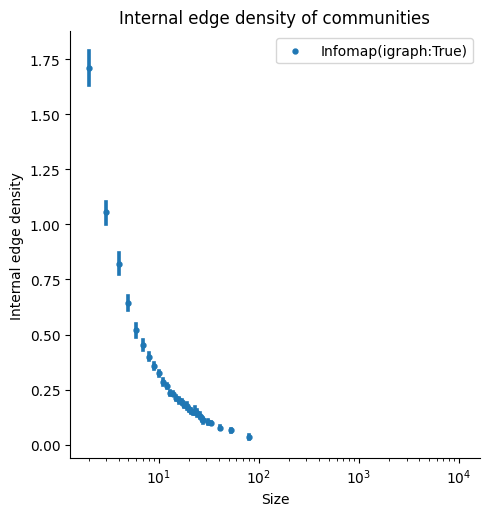

In [ ]:
# scatter plot
print(len(louvain_coms.communities))
print(len(lp_coms.communities))
print(len(demon_coms.communities))
print(len(infomap_coms.communities))

viz.plot_com_properties_relation([louvain_coms, lp_coms, demon_coms, infomap_coms], evaluation.size, evaluation.internal_edge_density, markers='.')
plt.xscale('log')
plt.xlabel('Size')
plt.ylabel('Internal edge density')
plt.title('Internal edge density of communities')
plt.show()

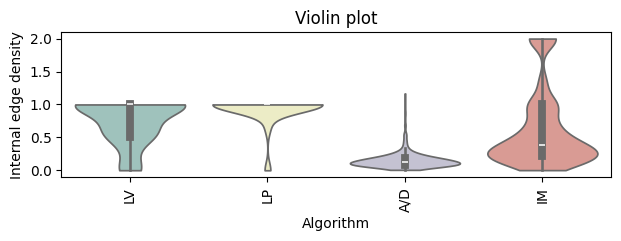

In [ ]:
# Violin plot
viz.plot_com_stat([louvain_coms, lp_coms, demon_coms, infomap_coms], evaluation.internal_edge_density)
plt.xlabel('Algorithm')
plt.ylabel('Internal edge density')
plt.title('Violin plot')
plt.xticks(ticks=[0,1,2,3], labels=['LV', 'LP', 'A/D', 'IM'])
plt.show()

In [12]:
# Calculating density and degree of communities with majority E and with majority I
import numpy as np
ex_comm = []
in_comm = []
size_ex = []
size_in = []
for community in infomap_coms.communities:
  purity_ext = sum(1 if g.nodes[node].get('label') == 'e' else 0 for node in community) / len(community)
  if purity_ext >= 0.6:
    ex_comm.append(community)
    size_ex.append(len(community))
  if purity_ext <= 0.4:
    in_comm.append(community)
    size_in.append(len(community))

print('Avg. size ex.', sum(size_ex) / len(ex_comm))
print('Avg. size in.', sum(size_in) / len(in_comm))


purity_ext = []
for community in ex_comm:
  purity_ext.append(sum(1 if g.nodes[node].get('label') == 'e' else 0 for node in community) / len(community))
purity_in = []
for community in in_comm:
  purity_in.append(sum(1 if g.nodes[node].get('label') == 'e' else 0 for node in community) / len(community))
print('Avg. purity ext', np.array(purity_ext).sum()/ len(ex_comm))
print('Avg. purity in',1-( np.array(purity_in).sum()/ len(in_comm)))


print('# maj. ex. comm =', len(ex_comm))
print('# maj. in. comm =', len(in_comm))

# Create NodeClustering objects for ex_comm and in_comm
from cdlib import NodeClustering
ex_comm_nc = NodeClustering(ex_comm, g, "ExComm")
in_comm_nc = NodeClustering(in_comm, g, "InComm")

ex_density = evaluation.internal_edge_density(g, ex_comm_nc)
in_density = evaluation.internal_edge_density(g, in_comm_nc)
print('density ex.', ex_density)
print('density in.', in_density)

ex_degree = evaluation.average_internal_degree(g, ex_comm_nc)
in_degree = evaluation.average_internal_degree(g, in_comm_nc)
print('deg. ex.', ex_degree)
print('deg. in', in_degree)

Avg. size ex. 5.084507042253521
Avg. size in. 34.207934336525305
Avg. purity ext 0.810239975204764
Avg. purity in 0.8188721006268949
# maj. ex. comm = 71
# maj. in. comm = 731
density ex. FitnessResult(min=0.18095238095238095, max=2.0, score=1.0096259972192037, std=0.6377349939807428)
density in. FitnessResult(min=0.0031609397629123953, max=2.0, score=0.5838651086188628, std=0.531478208282661)
deg. ex. FitnessResult(min=1.0, max=3.625, score=2.3065133223583927, std=0.5891184520167048)
deg. in FitnessResult(min=1.0, max=33.98958527059699, score=2.69017352406675, std=1.6517166428806813)
